# Tourism Dimension Imputation & Reduction

## Initial Dimensions

| Variable          | Name                                                                             |
|-------------------|----------------------------------------------------------------------------------|
| ST.INT.ARVL       | International tourism, number of arrivals                                        |
| ST.INT.RCPT.CD    | International tourism, receipts (current US\$)                                   |
| ST.INT.TVLR.CD    | International tourism, receipts for passenger transport items (current US\$)     |
| ST.INT.TRNR.CD    | International tourism, receipts for travel items (current US\$)                  |
| ST.INT.DPRT       | International tourism, expenditures (current US\$)                               |
| ST.INT.XPND.CD    | International tourism, expenditures for passenger transport items (current US\$) |
| ST.INT.TVLX.CD    | International tourism, expenditures for travel items (current US\$)              |
| ST.INT.TRNX.CD    | International tourism, number of departures                                      |
| ST.INT.RCPT.XP.ZS | International tourism, receipts (\% of total exports)                            |
| ST.INT.XPND.MP.ZS | International tourism, expenditures (% of total imports)                         |

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Read dataframe from parsing notebook
df = pd.read_pickle("../data/Tourism.pickle")

## Missing Data Drop
There appears to be a large amount of missing data.

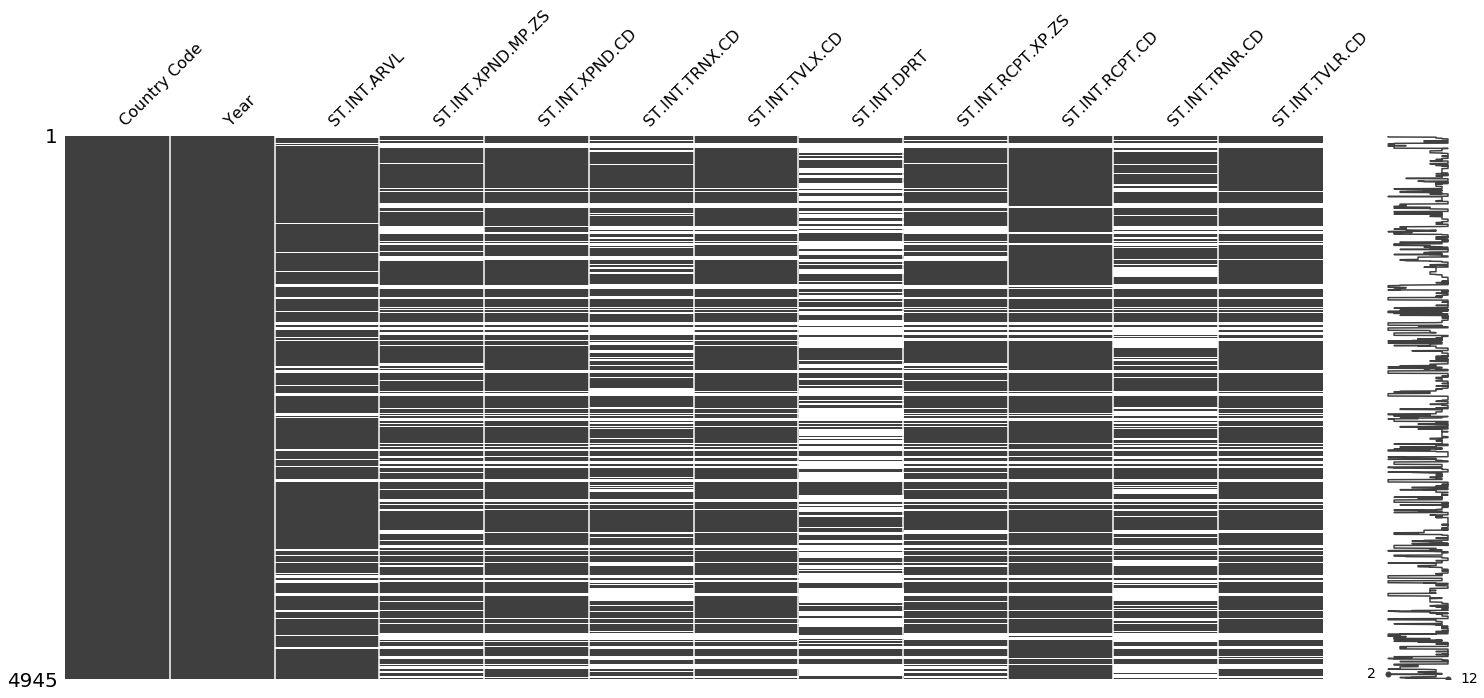

In [3]:
# Visualize missing data
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [4]:
# Describe missing by variable
counts = df.describe().loc['count',:]
ratios = counts.apply(lambda x: x / counts['Year'])
ratios

Year                1.000
ST.INT.ARVL         0.899
ST.INT.XPND.MP.ZS   0.758
ST.INT.XPND.CD      0.821
ST.INT.TRNX.CD      0.669
ST.INT.TVLX.CD      0.803
ST.INT.DPRT         0.454
ST.INT.RCPT.XP.ZS   0.759
ST.INT.RCPT.CD      0.863
ST.INT.TRNR.CD      0.613
ST.INT.TVLR.CD      0.806
Name: count, dtype: float64

In [5]:
# count data points by year
df.drop('Country Code',axis='columns').groupby('Year').count().sum(axis=1)

Year
1995    1426
1996    1457
1997    1477
1998    1479
1999    1491
2000    1504
2001    1527
2002    1563
2003    1577
2004    1591
2005    1653
2006    1660
2007    1691
2008    1694
2009    1705
2010    1696
2011    1697
2012    1714
2013    1693
2014    1693
2015    1679
2016    1663
2017    1485
dtype: int64

> There is no data before 1995 or after 2017, so those years should be dropped and variables reassesed

In [6]:
dy = df[(df['Year'] > 1994)]
dy = dy[(dy['Year'] < 2018)]

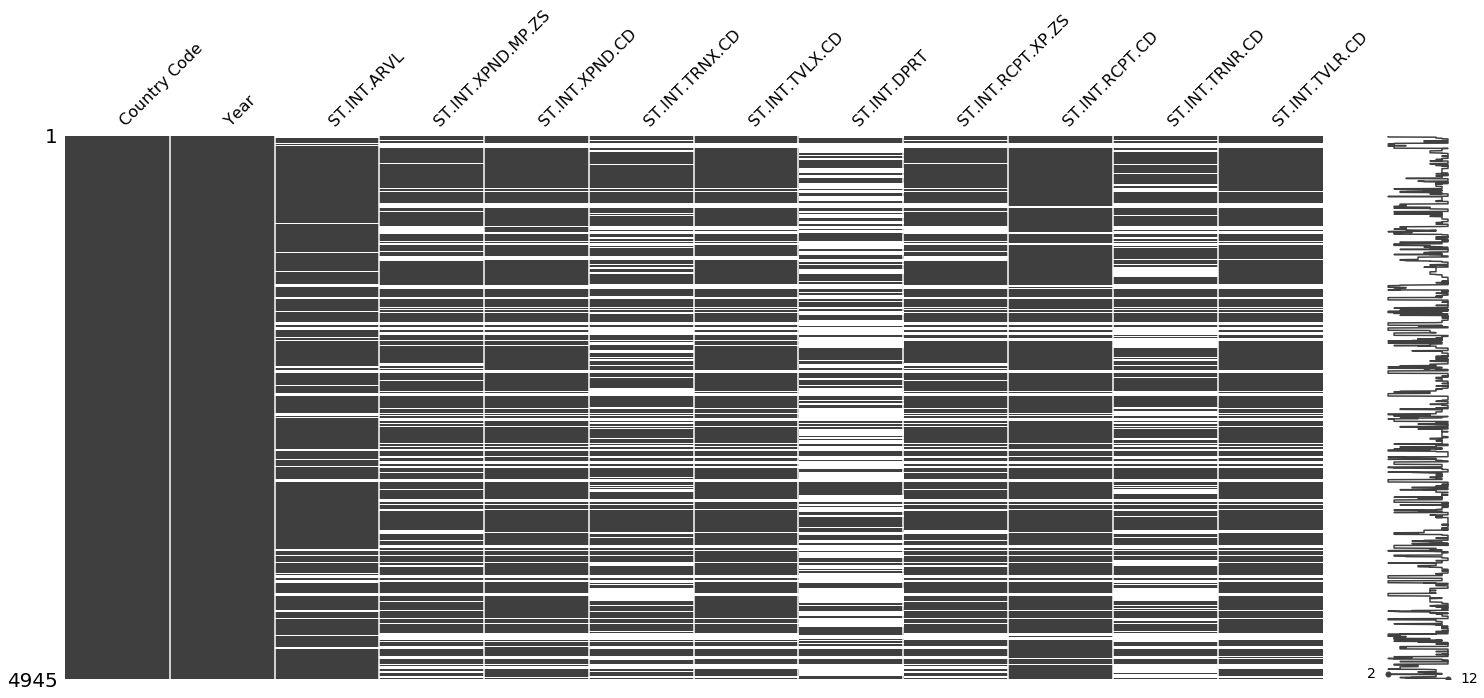

In [7]:
# Visualize missing data
%matplotlib inline
msno.matrix(dy)

In [8]:
# Describe missing by variable
counts = dy.describe().loc['count',:]
ratios = counts.apply(lambda x: x / counts['Year'])
ratios

Year                1.000
ST.INT.ARVL         0.899
ST.INT.XPND.MP.ZS   0.758
ST.INT.XPND.CD      0.821
ST.INT.TRNX.CD      0.669
ST.INT.TVLX.CD      0.803
ST.INT.DPRT         0.454
ST.INT.RCPT.XP.ZS   0.759
ST.INT.RCPT.CD      0.863
ST.INT.TRNR.CD      0.613
ST.INT.TVLR.CD      0.806
Name: count, dtype: float64

## Save Data

In [9]:
dy.to_pickle("../data/Tourism.pickle")

## Mising Analysis

### Country-level

In [38]:
# data points by country
countries = dy.drop('Year',axis='columns').groupby('Country Code').count().sum(axis=1)
no_data = countries[(countries == 0)]
all_data = countries[(countries == 230)]

{{ no_data.count() }} countries have no data: {{ no_data.index.tolist() }}

{{ all_data.count() }} countries have all 10 variables for all 23 years: {{ all_data.index.tolist() }}

### Histogram of countries data values
> It looks like most of the countries have 200 or more data points.

{{ countries.hist(bins=23) }}